In [38]:
import numpy as np
import os
from PIL import Image

In [39]:
#khai bien doc dia chi
train_data ='drive/MyDrive/AI/pic2/train'
test_data='drive/MyDrive/AI/pic2/test'
validation_data='drive/MyDrive/AI/pic2/validations'

In [40]:
listdata_train=[]
listdata_test=[]
listdata_validation=[]
dict={'nguyen':[0],'tai':[1],'hoa':[2]}

In [41]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[5]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [42]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)
listdata_validation=Getdata(validation_data,listdata_validation)

In [43]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(100, 1)

In [44]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])

In [45]:
x_validation=np.array([x[0] for _ ,x in enumerate(listdata_validation)])
y_validation=np.array([y[1] for _ ,y in enumerate(listdata_validation)])
x_validation.shape

(21, 150, 150, 3)

In [46]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [47]:
yname=y_train.flatten()

In [48]:
class_names=['nguyen','tai','hoa']
x_pre=x_test
y_pre=y_test
y_pre

array([[1],
       [2],
       [0],
       [1],
       [2],
       [0],
       [0],
       [2],
       [1]])

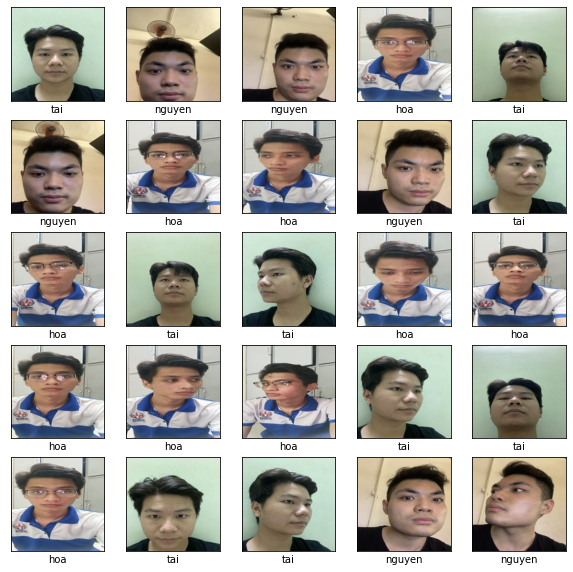

In [49]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [50]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_validation=x_validation.astype('float32')
x_train/=255
x_test/=255
x_validation/=255
y_train=np_utils.to_categorical(y_train,3)
y_test= np_utils.to_categorical(y_test,3)
y_validation= np_utils.to_categorical(y_validation,3)

In [51]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                  

In [52]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
history=model.fit(x_train,y_train,epochs=500,batch_size=70,verbose=1, validation_data=(x_validation,y_validation), callbacks=[EarlyStopping(monitor='val_loss', patience=100)]) 

Epoch 1/500
2/2 [==============================] - 4s 3s/step - loss: 14.5771 - accuracy: 0.4000 - val_loss: 61.0191 - val_accuracy: 0.3333
Epoch 2/500
2/2 [==============================] - 0s 188ms/step - loss: 41.8911 - accuracy: 0.3300 - val_loss: 2.9476 - val_accuracy: 0.3333
Epoch 3/500
2/2 [==============================] - 0s 191ms/step - loss: 2.2114 - accuracy: 0.4200 - val_loss: 1.0732 - val_accuracy: 0.3333
Epoch 4/500
2/2 [==============================] - 0s 187ms/step - loss: 0.8362 - accuracy: 0.6300 - val_loss: 0.8116 - val_accuracy: 0.4762
Epoch 5/500
2/2 [==============================] - 0s 188ms/step - loss: 0.8552 - accuracy: 0.5300 - val_loss: 0.6149 - val_accuracy: 0.7143
Epoch 6/500
2/2 [==============================] - 0s 182ms/step - loss: 0.3943 - accuracy: 0.8700 - val_loss: 0.3882 - val_accuracy: 0.8571
Epoch 7/500
2/2 [==============================] - 0s 189ms/step - loss: 0.1692 - accuracy: 0.9800 - val_loss: 0.2918 - val_accuracy: 0.8571
Epoch 8/500
2

In [54]:
model.save("select_people.h5")
model_nhandien=load_model('select_people.h5')

In [55]:
Score=model_nhandien.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.0
Test accuary 1.0


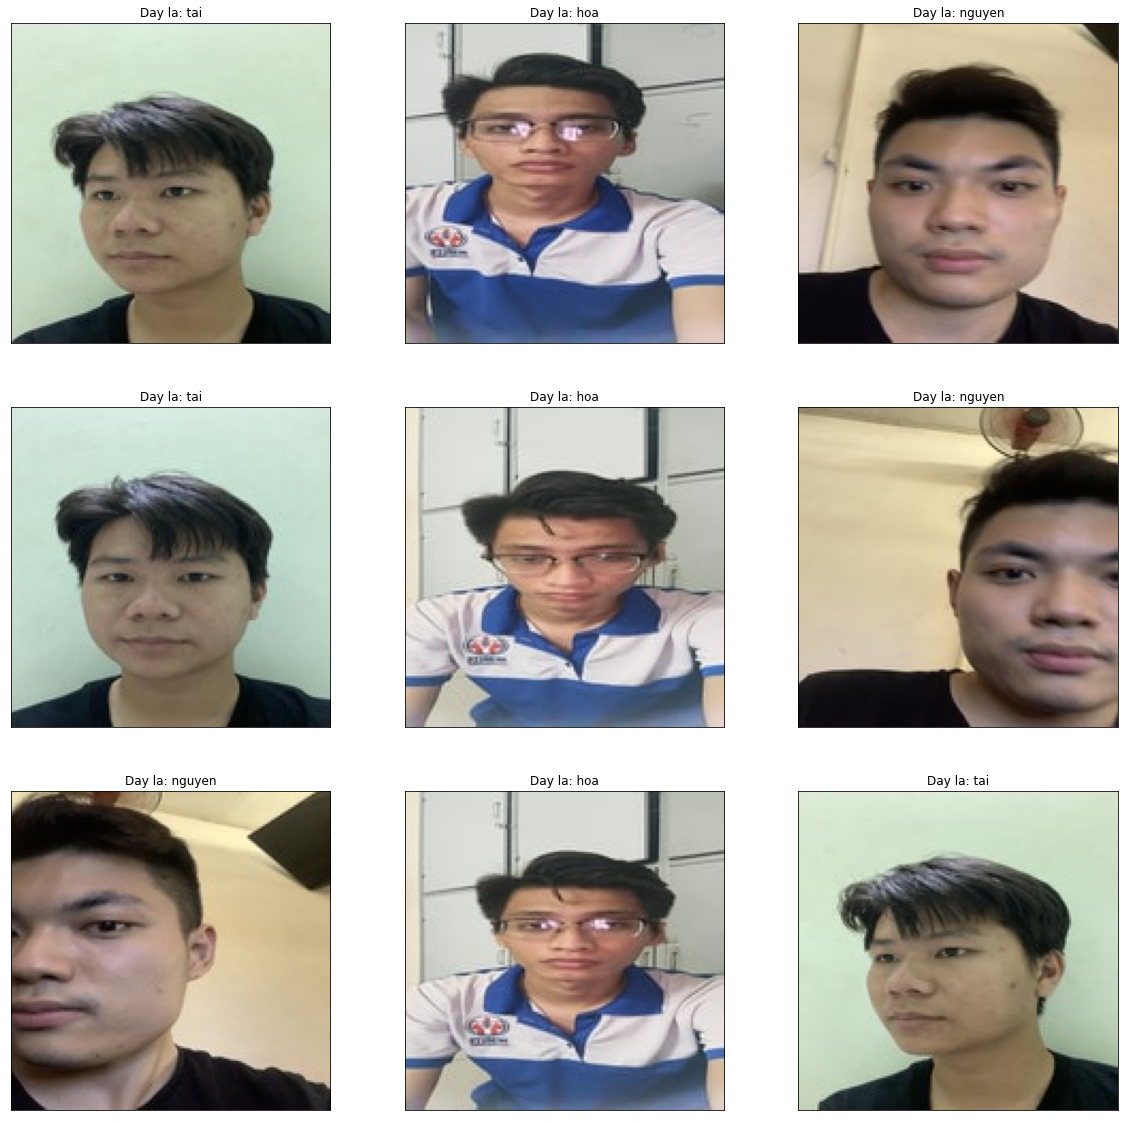

In [60]:
plt.figure(figsize=(20, 20))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title("Day la: " + str(class_names[np.argmax(model_nhandien.predict(x_pre[i].reshape((-1,150,150,3,))))]))
plt.show()